In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import pandas as pd

C:\Users\Lenovo\Downloads\Ineuron\deep_learning_project\CNN_Pytorch_implementation_13_MARCH\Pytorch-CNN\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Config():
    def __init__(self):
        self.ROOT_DATA_DIR = 'FashionMNISTDir'
        self.EPOCH = 10
        self.BATCH_SIZE = 32
        self.LEARNING_RATE = 0.01
        self.IMAGE_SIZE = (28,28)
        self.DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f'This notebook is using device: {self.DEVICE}')
        self.SEED = 2022

config = Config()

This notebook is using device: cpu


In [3]:
config.SEED

2022

In [4]:
config.ROOT_DATA_DIR

'FashionMNISTDir'

In [5]:
train_data = datasets.FashionMNIST(
                                   root = config.ROOT_DATA_DIR,
                                    train = True,
                                    download = True,
                                    transform = transforms.ToTensor()                                   
)

test_data = datasets.FashionMNIST(
                                   root = config.ROOT_DATA_DIR,
                                    train = False,
                                    download = True,
                                    transform = transforms.ToTensor()                                   
)

In [6]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: FashionMNISTDir
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: FashionMNISTDir
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [9]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [10]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
train_data.train_labels

C:\Users\Lenovo\Downloads\Ineuron\deep_learning_project\CNN_Pytorch_implementation_13_MARCH\Pytorch-CNN\env\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
given_label_map = train_data.class_to_idx
given_label_map

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [14]:
label_map = {v:k for k,v in given_label_map.items()}
label_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

# Visualize one of the samples

In [15]:
train_data.data[1]

tensor([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,  54,
          48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236, 255,
         255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196, 200,
         215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199, 201,
         196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,   0,   0],
        [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250, 245,
         249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,   0,   0],
        [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,  73,
          48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,   0,   0],
        [  0,   0,   0,   0, 200, 222, 209, 20

In [16]:
train_data.data[1].shape

torch.Size([28, 28])

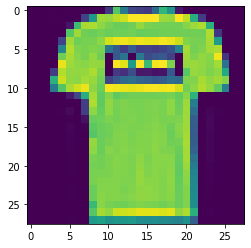

In [17]:
plt.imshow(train_data.data[1])

T-shirt/top


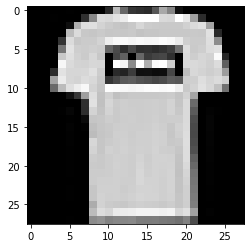

In [18]:
plt.imshow(train_data.data[1],cmap = 'gray')
print(label_map[train_data.targets[1].item()])

In [19]:
train_data.targets[1].item()

0

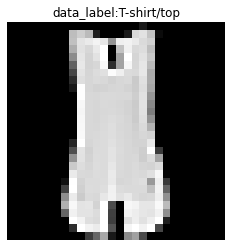

In [20]:
def view_sample_img(data, idx, label_map):
    
    plt.imshow(train_data.data[idx],cmap = 'gray')
    plt.title(f'data_label:{label_map[train_data.targets[idx].item()]}')
    plt.axis('off')

view_sample_img(train_data, 4, label_map)

# Creating DataLoader

In [21]:
train_data_loader = DataLoader(
                                dataset = train_data,
                                batch_size = config.BATCH_SIZE,
                                shuffle = True
)

test_daa_loader = DataLoader(
                                dataset = test_data,
                                batch_size = config.BATCH_SIZE,
                                shuffle = True
)

In [22]:
train_data_loader

In [23]:
type(train_data_loader)

torch.utils.data.dataloader.DataLoader

In [24]:
for images,labels in train_data_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [25]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0039, 0.3451, 0.3490, 0.4314, 0.4588, 0.4157,
          0.3961, 0.2510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0863, 0.8510, 0.9373, 0.8863, 0.9804, 0.9843, 0.8980,
          0.9176, 0.9137, 1.0000, 0.1765, 0.0000, 0.0118, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.8157, 0.9176, 0.8863, 0.9137, 0.8706, 0.8745, 0.8667,
          0.8745, 0.9098, 0.9176, 0.7569, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0078,
          0.7686, 0.8863, 0.8353, 0.8745, 0.9725, 0.8314, 0.7255, 0.7843,
          0.9647, 0.9373, 0.8353, 0.8588, 0.7922, 0.3647,

In [26]:
images[0].shape

torch.Size([1, 28, 28])

In [27]:
images[0].permute(1,2,0).shape

torch.Size([28, 28, 1])

In [28]:
images[0].squeeze().shape

torch.Size([28, 28])

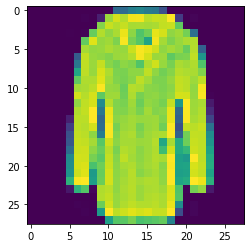

In [29]:
plt.imshow(images[0].squeeze())

In [30]:
images[0].squeeze().numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.34509805, 0.34901962, 0.43137255, 0.45882353,
        0.41568628, 0.39607844, 0.2509804 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.08627451,
        0.8509804 , 0.9372549 , 0.8862745 , 0.98039216, 0.9843137 ,
        0.8980392 , 0.91764706, 0.9137255 , 1.        , 0.1764706 ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8156863 ,
        0.91764706, 0.8862745 , 0.9137255 , 0.87058824, 0.8745098 ,
        0.8666667 , 0.8745

In [31]:
images[0].squeeze().numpy().shape

(28, 28)

In [32]:
print(images[0].shape)
print(images[0].squeeze().shape)
print(images[0].unsqueeze(dim = 1).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 1, 28, 28])


In [33]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        
        pass
    
    def forward(self, x):
        pass

In [34]:
class CNN(nn.Module):
    def __init__(self, in_, out_):
        super(CNN, self).__init__()
        
        self.conv_pool_01 = nn.Sequential(
                                nn.Conv2d(in_channels = in_, out_channels = 8, kernel_size = 5, stride = 1,padding  = 0),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.conv_pool_02 = nn.Sequential(
                                nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5, stride = 1,padding  = 0),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.Flatten = nn.Flatten()
        self.FC_01 = nn.Linear(in_features = 16*4*4, out_features = 128)
        self.FC_02 = nn.Linear(in_features = 128, out_features = 64)
        self.FC_03 = nn.Linear(in_features = 64, out_features = out_)
        
    
    def forward(self, x):
        x = self.conv_pool_01(x)
        x = self.conv_pool_02(x)
        x = self.Flatten(x)
        x = F.relu(self.FC_01(x))
        x = F.relu(self.FC_02(x))
        x = F.relu(self.FC_03(x))

In [35]:
model = CNN(1, 10)

print(model)

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)


In [36]:
model.conv_pool_02

Sequential(
  (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [37]:
model.parameters()

<generator object Module.parameters at 0x00000206D879D3C8>

In [38]:
next(model.parameters()).is_cuda

False

In [39]:
model.to(config.DEVICE)# this won't work for my system as I dont have GPU

CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)

In [40]:
next(model.parameters()).is_cuda # this won't work for my system as I dont have GPU

False

# Count the number of Trainable parameters

In [41]:
model.named_parameters()

<generator object Module.named_parameters at 0x00000206D879D948>

In [42]:
def count_params(model):
    model_params = {'Modules': list(), 'Parameters': list()}
    total = {'trainable':0, 'non_trainable':0}

    for name,parameters in model.named_parameters():
        param = parameters.numel()
        
        if not parameters.requires_grad:
            total['non_trainable'] += param
            continue

        model_params['Modules'].append(name)
        model_params['Parameters'].append(param)
        total['trainable'] += param

    df = pd.DataFrame(model_params)
    df = df.style.set_caption(f'Total parameters: {total}')
    return df

In [43]:
count_params(model)

,Modules,Parameters
0,conv_pool_01.0.weight,200
1,conv_pool_01.0.bias,8
2,conv_pool_02.0.weight,3200
3,conv_pool_02.0.bias,16
4,FC_01.weight,32768
5,FC_01.bias,128
6,FC_02.weight,8192
7,FC_02.bias,64
8,FC_03.weight,640
9,FC_03.bias,10


# Training loop

In [44]:
# traning samples - 60k
# batch size - 32
60000/32 # steps per epcoh

1875.0

In [49]:
len(train_data_loader)

1875

In [64]:
model.parameters

<bound method Module.parameters of CNN(
  (conv_pool_01): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_02): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (FC_01): Linear(in_features=256, out_features=128, bias=True)
  (FC_02): Linear(in_features=128, out_features=64, bias=True)
  (FC_03): Linear(in_features=64, out_features=10, bias=True)
)>

In [66]:
criterion = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr = config.LEARNING_RATE)

In [61]:
criterion

CrossEntropyLoss()

In [60]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [74]:
for epoch in range(config.EPOCH):
    with tqdm(train_data_loader) as tqdm_epoch:
        for images, labels in tqdm_epoch:
            tqdm_epoch.set_description(f'Epoch {epoch+1}/{config.EPOCH}')
            
            # put images on CUDA device
            images = images.to(config.DEVICE)
            labels = labels.to(config.DEVICE)
            
            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels) # passing the pred  and target
            
            # backward propogation
            optimizer.zero_grad() # zero the past gradient (if any)
            loss.backward() # calculate the gradients
            optimizer.step() # weights update rule
            
            
            tqdm_epoch.set_postfix(loss=loss.item())

Epoch 1/10:   0%|                                     | 0/1875 [00:00<?, ?it/s]


TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not NoneType